In [3]:
import keras
from keras.models import Sequential
from keras.datasets import mnist # mnist 모듈 임포트
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout

import numpy as np
import matplotlib.pylab as pylab

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # 영상 데이터 읽기
print(X_train.shape, X_test.shape) # (60000, 28, 28) (10000, 28, 28)

# 4차원 형태로 변환[samples][width][height][1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255 # 학습 데이터 정규화
X_test = X_test / 255 # 테스트 데이터 정규화
y_train = to_categorical(y_train) # one-hot-encoding of the labels
y_test = to_categorical(y_test)
num_classes = y_test.shape[1] # 분류 클래스 개수

def FC_model(): # 모델 생성 함수
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1))) # 1차원 벡터화 후 추가
    model.add(Dense(200, activation='relu')) # relu 활성화 추가
    model.add(Dropout(0.15)) # 드롭아웃 레이트: 0.15
    model.add(Dense(200, activation='relu')) # relu 활성화 추가
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy',\
                  metrics=['accuracy'])
    return model

model = FC_model() # 모델 구축
model.summary() # 모델 정보 요약 출력

# 학습: 모델의 가중치 산정
model.fit(X_train, y_train, validation_data=(X_test, y_test), \
epochs=10, batch_size=200, verbose=2)

# 모델 평가
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \nError: {}".format(scores[1], 100-scores[1]*100))

(60000, 28, 28) (10000, 28, 28)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-tra

In [ ]:
네트워크 시각화

In [5]:
# pydot_ng 설치 필요: pip install pydot_ng 
# graphviz 설치 필요: conda install graphviz 
import pydot_ng as pydot
from keras.utils import plot_model

plot_model(model, to_file='model.png')

In [ ]:
중간 계층에서 가중치 시각화

(784, 200)
(200,)


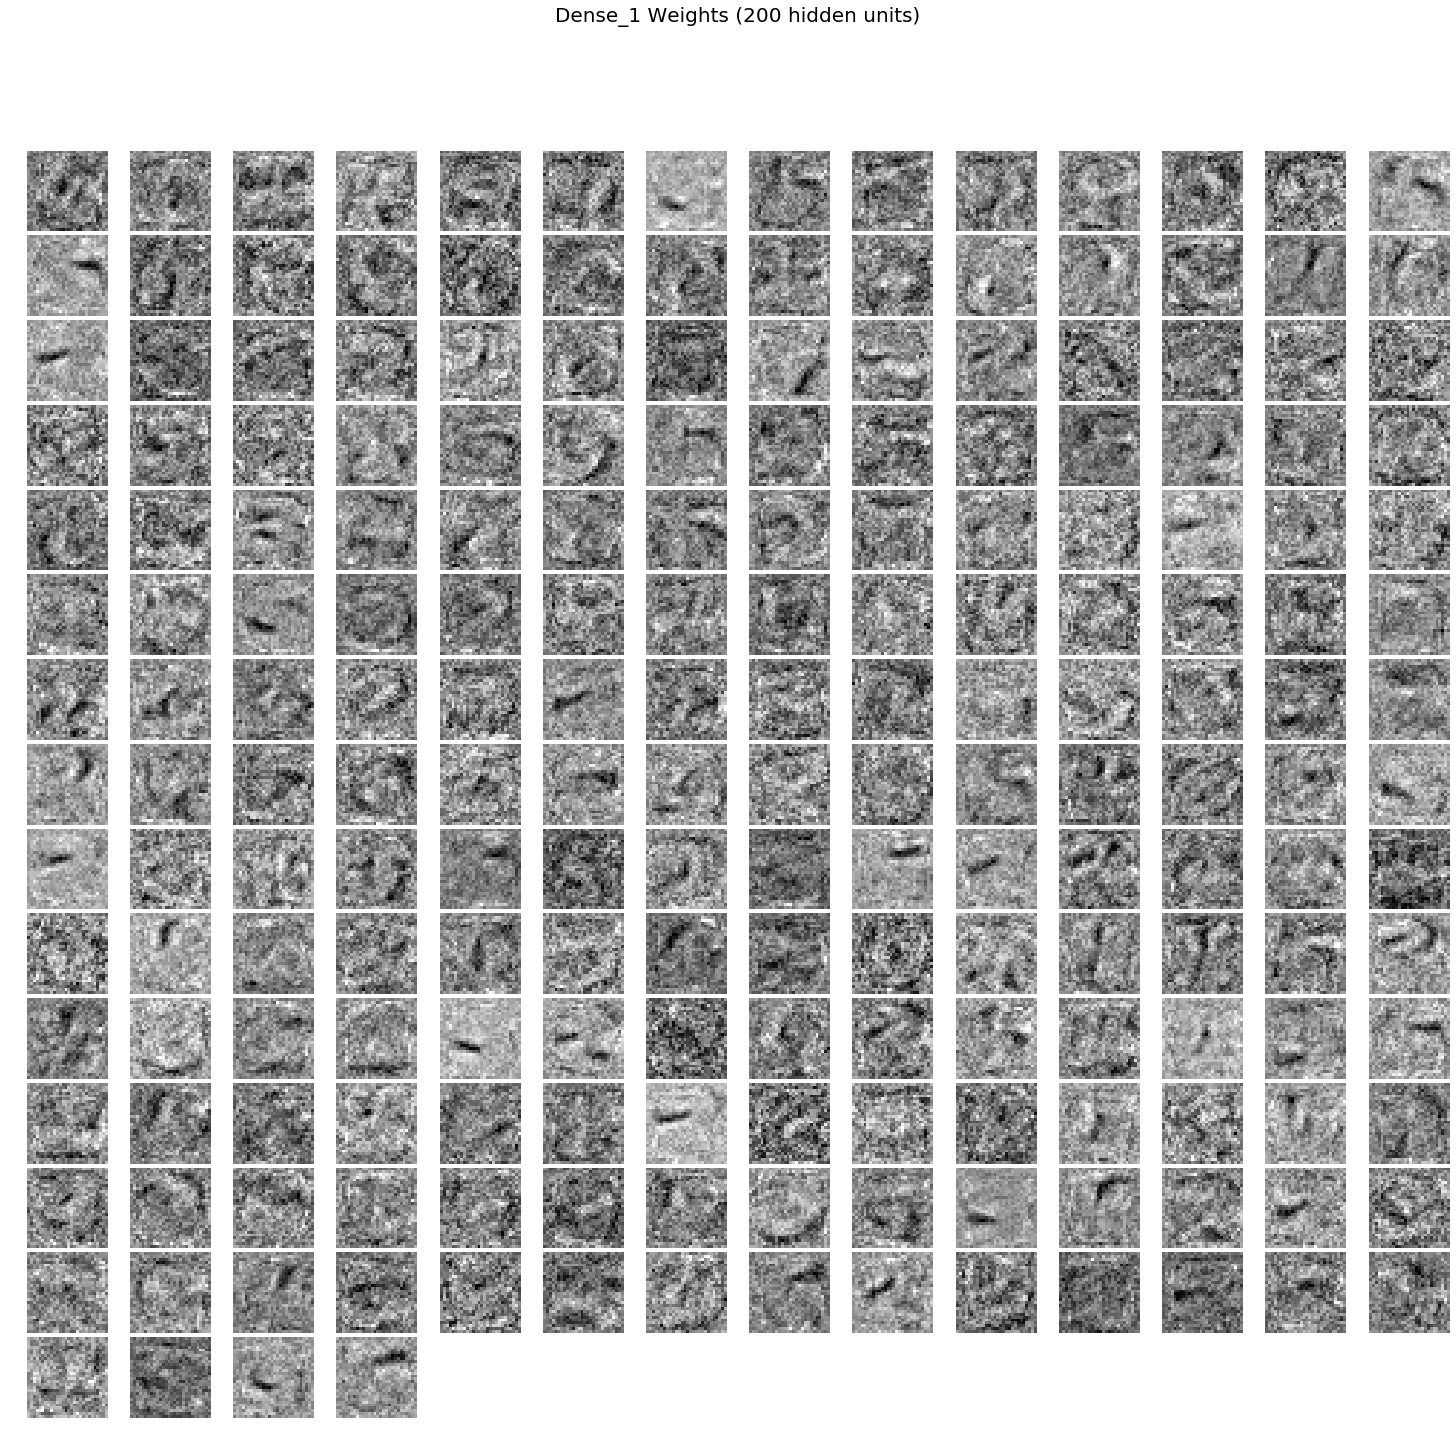

In [6]:
W = model.get_layer('dense_1').get_weights()
print(W[0].shape) # 첫 번째 은닉층의 가중치
print(W[1].shape) # 첫 번째 은닉층의 bias

fig = pylab.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, hspace=0.05, wspace=0.05)
pylab.gray()

for i in range(200):
    pylab.subplot(15, 14, i+1), pylab.axis('off')
    pylab.imshow(np.reshape(W[0][:, i], (28,28))) # 786개 1차원 벡터 → 28 × 28 영상
pylab.suptitle('Dense_1 Weights (200 hidden units)', size=20)
pylab.show()